In [1]:
import matplotlib.pyplot as plt

In [2]:
#创建数据集
def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [3]:
#使用文本注解绘制树节点
decisionNode=dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.8")
arrow_args=dict(arrowstyle="<-")

In [4]:
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords="axes fraction",xytext=centerPt,textcoords='axes fraction',va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)

In [5]:
def createPlot():
    fig=plt.figure(1,facecolor="white")
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode("a decision node",(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode("a leaf node",(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

In [6]:
#获取叶子节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs=0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":
            numLeafs+=getNumLeafs(secondDict[key])
        else:numLeafs+=1
    return numLeafs

In [7]:
def getTreeDepth(myTree):
    maxDepth=0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":
            thisDepth=1+getTreeDepth(secondDict[key])
        else: 	thisDepth=1
        if thisDepth>maxDepth:maxDepth=thisDepth
    return maxDepth

In [8]:
def retrieveTree(i):
    listOfTrees=[{"no surfacing":{0:"no",1:{"flippers":{0:"no",1:"yes"}}}},
                {"no surfacing":{0:"no",1:{"flippers":{0:{"head":{0:"no",1:"yes"}},1:"no"}}}}
                ]
    return listOfTrees[i]

In [9]:
def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/2.0+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2.0+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

In [10]:
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    cntrPt=(plotTree.xOff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),
                cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD

In [11]:
def createPlot(inTree):
    fig=plt.figure(1,facecolor="white")
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.xOff= -0.5/plotTree.totalW;plotTree.yOff=1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

In [12]:
def classify(inputTree,featLabels,testVec):
    firstSides = list(inputTree.keys())
    firstStr = firstSides[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=="dict":
                classLabel=classify(secondDict[key],featLabels,testVec)
            else: classLabel=secondDict[key]
    return classLabel

In [13]:
#使用pickle模块存储决策树
def storeTree(inputTree,filename):
    import pickle
    fw=open(filename,"wb")
    pickle.dump(inputTree,fw)
    fw.close()
def grabTree(filename):
    import pickle
    fr=open(filename,"rb")
    return pickle.load(fr)

In [17]:
myTree=retrieveTree(0)

storeTree(myTree,"classifierStorage.txt")
print(grabTree("classifierStorage.txt"))

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [19]:
myDat,labels=createDataSet()
print(labels)
myTree=retrieveTree(0)
print(myTree)
print(classify(myTree,labels,[1,0]))
print(classify(myTree,labels,[1,1]))

['no surfacing', 'flippers']
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
no
yes


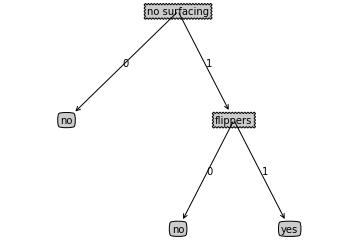

In [21]:
createPlot(myTree)

In [22]:
print(retrieveTree(1))

{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
